In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

In [2]:
df_competencia_scrapping = pd.read_pickle("../data/web_scrapping/hoteles_competencia_info_scrapping.pkl")
df_competencia = pd.read_pickle("../data/limpieza/hoteles_competencia.pkl")
df_propios = pd.read_pickle("../data/limpieza/hoteles_propios.pkl")


In [3]:
df_competencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5172 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_reserva       5172 non-null   object        
 1   id_cliente       5172 non-null   int64         
 2   nombre           5172 non-null   object        
 3   apellido         5172 non-null   object        
 4   mail             5172 non-null   object        
 5   competencia      5172 non-null   bool          
 6   fecha_reserva    0 non-null      datetime64[ns]
 7   inicio_estancia  5172 non-null   datetime64[ns]
 8   final_estancia   5172 non-null   datetime64[ns]
 9   id_hotel         5172 non-null   int64         
 10  precio_noche     0 non-null      float64       
 11  nombre_hotel     5172 non-null   object        
 12  valoracion       0 non-null      float64       
 13  ciudad           5172 non-null   object        
dtypes: bool(1), datetime64[ns](3), float64(2), i

REASIGNAR ID A CADA HOTEL Y ASIGNAR LOS VALORES DEL WEB SCRAPPING

In [4]:
hoteles_competencia = df_competencia.groupby('id_hotel')

valores = df_competencia_scrapping[["nombre", "rating", "precio_noche", "fecha_reserva"]].values.tolist()


# Iterar sobre los grupos y asignar valores secuenciales
for i, (id_hotel, grupos_df_competencia) in enumerate(hoteles_competencia):

    # Obtener valores de df_competencia_scrapping
    nombre = valores[i][0]
    rating = valores[i][1]
    precio_noche = valores[i][2]
    fecha_reserva = valores[i][3]

    
    # Asignar los valores a los registros del grupo:

    # Asignamos a la columna nombre_hotel del df_competencia agrupados por id_hotel el nombre del elemento id de los valores de df_competencia_scrapping 
    df_competencia.loc[df_competencia['id_hotel'] == id_hotel, 'nombre_hotel'] = nombre

    # Asignamos a la columna estrellas del df_competencia agrupados por id_hotel las estrellas del elemento i de los valores de df_competencia_scrapping 
    df_competencia.loc[df_competencia['id_hotel'] == id_hotel, 'valoracion'] = rating

    # Asignamos a la columna precio_noche del df_competencia agrupados por id_hotel el precio_noche del elemento i de los valores de df_competencia_scrapping 
    df_competencia.loc[df_competencia['id_hotel'] == id_hotel, 'precio_noche'] = precio_noche

    # Asignamos a la columna fecha_reserva del df_competencia agrupados por id_hotel la fecha_reserva del elemento i de los valores de df_competencia_scrapping 
    df_competencia.loc[df_competencia['id_hotel'] == id_hotel, 'fecha_reserva'] = fecha_reserva




VERIFICAR CAMBIOS

In [5]:
for i, (hotel, grupo) in enumerate(df_competencia.groupby("id_hotel")):
    display(grupo.sample(5))

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
459,34b0e7ec-81b7-483b-921b-1ac3c27b1d4a,1625,Augusto,Bilbao,augusto.bilbao@example.com,True,2025-02-26,2025-03-01,2025-03-02,103,255.0,Novotel Madrid Center,4.6,
2963,a269eb0a-60ad-44fc-95c8-43328be38952,9976,Mateo,Ruano,mateo.ruano@example.com,True,2025-02-26,2025-03-01,2025-03-02,103,255.0,Novotel Madrid Center,4.6,
9915,0f90af72-b405-4484-940d-e0b9154c8f29,11514,Paulina,Cañete,paulina.cañete@example.com,True,2025-02-26,2025-03-01,2025-03-02,103,255.0,Novotel Madrid Center,4.6,
6996,9116c610-1e9c-4db2-bf31-1c1a0bee6977,8876,Luisa,Valverde,luisa.valverde@example.com,True,2025-02-26,2025-03-01,2025-03-02,103,255.0,Novotel Madrid Center,4.6,
8567,df9d00d0-e909-417a-8695-50a5a8ea72b3,1054,Ana,Uría,ana.uría@example.com,True,2025-02-26,2025-03-01,2025-03-02,103,255.0,Novotel Madrid Center,4.6,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
10295,1259017e-7e0a-45a7-be81-f737eeaae0a1,10524,Nadia,Melero,nadia.melero@example.com,True,2025-02-26,2025-03-01,2025-03-02,113,110.0,ibis budget Madrid Calle 30,4.4,
9450,d776d255-4656-4bfd-a6ee-8685bfb444ee,5932,Genoveva,Tomás,genoveva.tomás@example.com,True,2025-02-26,2025-03-01,2025-03-02,113,110.0,ibis budget Madrid Calle 30,4.4,
12031,89682352-60e2-4e95-8389-664fad92c7f8,4706,Eric,Alcázar,eric.alcázar@example.com,True,2025-02-26,2025-03-01,2025-03-02,113,110.0,ibis budget Madrid Calle 30,4.4,
6320,d5cdb7f0-e59d-44f9-8af5-fb8bede2495e,8350,Leonel,Vidal,leonel.vidal@example.com,True,2025-02-26,2025-03-01,2025-03-02,113,110.0,ibis budget Madrid Calle 30,4.4,
7968,d64a41c1-3ef1-41fa-83ba-0f84689aa736,12234,René,Tamayo,rené.tamayo@example.com,True,2025-02-26,2025-03-01,2025-03-02,113,110.0,ibis budget Madrid Calle 30,4.4,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
3616,b7b9591d-b843-439b-b36c-f47807a957bb,12394,Roberta,Rosa,roberta.rosa@example.com,True,2025-02-26,2025-03-01,2025-03-02,114,119.0,ibis budget Madrid Centro las Ventas,4.3,
14,77354d6e-4713-496f-af21-c231b909e29c,8914,Luna,Segovia,luna.segovia@example.com,True,2025-02-26,2025-03-01,2025-03-02,114,119.0,ibis budget Madrid Centro las Ventas,4.3,
3611,84a7db93-d9c6-4ea4-b5a5-c7b8b2735d10,5672,Francisca,Chico,francisca.chico@example.com,True,2025-02-26,2025-03-01,2025-03-02,114,119.0,ibis budget Madrid Centro las Ventas,4.3,
7930,a41d879b-5b40-41d4-a1b0-18785991a03a,6795,Inés,Plana,inés.plana@example.com,True,2025-02-26,2025-03-01,2025-03-02,114,119.0,ibis budget Madrid Centro las Ventas,4.3,
3273,882287a6-478e-444f-93c5-35400acc0637,11108,Olalla,Martin,olalla.martin@example.com,True,2025-02-26,2025-03-01,2025-03-02,114,119.0,ibis budget Madrid Centro las Ventas,4.3,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
14011,d82ca5d6-0eea-44e2-a00b-0ac6c4e0ef14,5635,Florina,Pastor,florina.pastor@example.com,True,2025-02-26,2025-03-01,2025-03-02,117,173.0,Novotel Madrid City Las Ventas,4.6,
5874,70aca202-95b0-4462-b1cb-5207742e3cfb,10325,Modesta,Arnal,modesta.arnal@example.com,True,2025-02-26,2025-03-01,2025-03-02,117,173.0,Novotel Madrid City Las Ventas,4.6,
5520,a06a6f1b-b0b9-4fdb-bb3f-618bdead5548,8406,Leticia,Sola,leticia.sola@example.com,True,2025-02-26,2025-03-01,2025-03-02,117,173.0,Novotel Madrid City Las Ventas,4.6,
9738,f0c6c282-e957-43df-b9e1-5cde7d6a48ac,9181,Manuel,Bayona,manuel.bayona@example.com,True,2025-02-26,2025-03-01,2025-03-02,117,173.0,Novotel Madrid City Las Ventas,4.6,
3613,c219a611-aa07-4406-9475-4262f9993b0e,8895,Luisina,Zabala,luisina.zabala@example.com,True,2025-02-26,2025-03-01,2025-03-02,117,173.0,Novotel Madrid City Las Ventas,4.6,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
10046,150b295c-0ebe-46fe-8f23-9c74120b1031,9262,Marcela,Manrique,marcela.manrique@example.com,True,2025-02-26,2025-03-01,2025-03-02,128,95.0,ibis budget Madrid Calle Alcalá,4.3,
2967,523fa1f6-7c25-46a2-8f52-e48681bd8ccd,295,Adán,Villaverde,adán.villaverde@example.com,True,2025-02-26,2025-03-01,2025-03-02,128,95.0,ibis budget Madrid Calle Alcalá,4.3,
7703,3d05d08f-50db-47dc-94b8-79bb1713ea05,10754,Nico,Guzmán,nico.guzmán@example.com,True,2025-02-26,2025-03-01,2025-03-02,128,95.0,ibis budget Madrid Calle Alcalá,4.3,
9143,893a313a-1f8c-43e3-b196-755a77f869fe,1444,Aristides,Blanch,aristides.blanch@example.com,True,2025-02-26,2025-03-01,2025-03-02,128,95.0,ibis budget Madrid Calle Alcalá,4.3,
12347,cf42fa52-bc5b-405f-a39a-a57f4a365b68,3821,Diana,Garriga,diana.garriga@example.com,True,2025-02-26,2025-03-01,2025-03-02,128,95.0,ibis budget Madrid Calle Alcalá,4.3,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
619,002065a3-48d1-4d36-a3be-874a5e53916f,14005,Trini,Salgado,trini.salgado@example.com,True,2025-02-26,2025-03-01,2025-03-02,131,119.0,ibis Madrid Calle Alcalá,4.5,
3827,974589bd-5d54-4cce-a1d2-b910f5af28f4,13136,Sarita,Campo,sarita.campo@example.com,True,2025-02-26,2025-03-01,2025-03-02,131,119.0,ibis Madrid Calle Alcalá,4.5,
2655,7717db73-479f-447d-9cf2-2a93bd42100f,11341,Pacífica,Llamas,pacífica.llamas@example.com,True,2025-02-26,2025-03-01,2025-03-02,131,119.0,ibis Madrid Calle Alcalá,4.5,
341,f8d632a5-8a7c-4e19-8196-570b55151b65,6940,Isaura,Madrigal,isaura.madrigal@example.com,True,2025-02-26,2025-03-01,2025-03-02,131,119.0,ibis Madrid Calle Alcalá,4.5,
14303,561d0419-da1f-45b7-9c54-4cbf84352184,14158,Valero,Perea,valero.perea@example.com,True,2025-02-26,2025-03-01,2025-03-02,131,119.0,ibis Madrid Calle Alcalá,4.5,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
9614,9aaa9e3a-d13a-45d7-a816-17f7af9791b3,12746,Ruben,Marí,ruben.marí@example.com,True,2025-02-26,2025-03-01,2025-03-02,135,107.0,ibis budget Madrid Vallecas,4.3,
12357,7c9bcb51-e545-4e79-812f-91a1bc3fe0a8,11638,Pepito,Pulido,pepito.pulido@example.com,True,2025-02-26,2025-03-01,2025-03-02,135,107.0,ibis budget Madrid Vallecas,4.3,
7464,23ef304e-13e6-4379-bc1a-da63ea173030,3143,Cleto,Julián,cleto.julián@example.com,True,2025-02-26,2025-03-01,2025-03-02,135,107.0,ibis budget Madrid Vallecas,4.3,
7339,b8ef0004-0e34-4fc7-a010-57cc2bae8042,12050,Ramón,Marti,ramón.marti@example.com,True,2025-02-26,2025-03-01,2025-03-02,135,107.0,ibis budget Madrid Vallecas,4.3,
3188,5f5e3900-8880-4fed-8be8-f65541e504ff,5637,Florina,Pol,florina.pol@example.com,True,2025-02-26,2025-03-01,2025-03-02,135,107.0,ibis budget Madrid Vallecas,4.3,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
4523,d8faa1fe-2744-4c28-92bd-c50c6c50d39f,8986,Lázaro,Barón,lázaro.barón@example.com,True,2025-02-26,2025-03-01,2025-03-02,181,129.0,Pullman Madrid Airport & Feria,4.2,
12688,f30c54cd-742d-4b33-b69d-80aa16e6bd8d,3927,Dominga,Soria,dominga.soria@example.com,True,2025-02-26,2025-03-01,2025-03-02,181,129.0,Pullman Madrid Airport & Feria,4.2,
10989,71d31314-9019-4463-8cd8-c6e71cf00657,12881,Rómulo,Madrigal,rómulo.madrigal@example.com,True,2025-02-26,2025-03-01,2025-03-02,181,129.0,Pullman Madrid Airport & Feria,4.2,
1886,13698e9f-167f-4085-9fed-de88358043ec,13313,Severiano,Roda,severiano.roda@example.com,True,2025-02-26,2025-03-01,2025-03-02,181,129.0,Pullman Madrid Airport & Feria,4.2,
12048,f85ba84f-1e2f-4844-997f-fba98b5c18a5,9845,María Jesús,Falcó,maría jesús.falcó@example.com,True,2025-02-26,2025-03-01,2025-03-02,181,129.0,Pullman Madrid Airport & Feria,4.2,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
4843,d25b60cc-037c-4af1-9ac4-8bc7987f3e6a,10701,Nazario,Ortiz,nazario.ortiz@example.com,True,2025-02-26,2025-03-01,2025-03-02,186,154.0,Novotel Madrid Campo de las Naciones,4.5,
13324,436c0a75-d5b3-468a-ae1d-2960da32cb91,1737,Azeneth,Galván,azeneth.galván@example.com,True,2025-02-26,2025-03-01,2025-03-02,186,154.0,Novotel Madrid Campo de las Naciones,4.5,
1860,da7fb78c-c6bd-4527-b583-fdce5f0ad44a,3162,Cloe,Gelabert,cloe.gelabert@example.com,True,2025-02-26,2025-03-01,2025-03-02,186,154.0,Novotel Madrid Campo de las Naciones,4.5,
3283,60e59786-ba38-4ea6-aa75-a3f257930845,6612,Humberto,Gomila,humberto.gomila@example.com,True,2025-02-26,2025-03-01,2025-03-02,186,154.0,Novotel Madrid Campo de las Naciones,4.5,
9756,1b7697c5-9cda-4bf5-a397-ed58df2de37b,9089,Malena,Pintor,malena.pintor@example.com,True,2025-02-26,2025-03-01,2025-03-02,186,154.0,Novotel Madrid Campo de las Naciones,4.5,


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
3330,34152a5c-1fb3-4e86-88b2-f73c30f86185,5891,Gema,Abad,gema.abad@example.com,True,2025-02-26,2025-03-01,2025-03-02,194,116.0,ibis Madrid Aeropuerto Barajas,4.4,
7419,808ab306-c4dc-4968-b269-f0596b93ff4d,11535,Paulino,Burgos,paulino.burgos@example.com,True,2025-02-26,2025-03-01,2025-03-02,194,116.0,ibis Madrid Aeropuerto Barajas,4.4,
8776,d656e254-5088-4818-aeb3-7ff63058fd2d,3919,Dominga,García,dominga.garcía@example.com,True,2025-02-26,2025-03-01,2025-03-02,194,116.0,ibis Madrid Aeropuerto Barajas,4.4,
12785,09a0b803-f8e5-4272-bdd9-f8692d1715f6,14107,Valentín,Cabeza,valentín.cabeza@example.com,True,2025-02-26,2025-03-01,2025-03-02,194,116.0,ibis Madrid Aeropuerto Barajas,4.4,
6720,8dc8d715-26f6-4d64-89c7-e4638e84baeb,1390,Arcelia,Miralles,arcelia.miralles@example.com,True,2025-02-26,2025-03-01,2025-03-02,194,116.0,ibis Madrid Aeropuerto Barajas,4.4,


In [6]:
df_competencia.to_pickle("../data/limpieza/hoteles_competencia_completo.pkl")

UNIR DATAFRAMES

In [7]:
df_final = pd.concat([df_propios, df_competencia], ignore_index=True)
df_final.sample(5)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad
7509,0ddc1961-5988-4118-8231-09c7555d6c64,13345,Sigfrido,Berenguer,sigfrido.berenguer@example.com,False,2025-02-04,2025-03-01,2025-03-02,15,83.45,Hotel Rincón Sereno,3.00,Madrid
5242,bd34c582-927e-43da-b51b-caa88c248581,12573,Rosalina,Fábregas,rosalina.fábregas@example.com,False,2025-02-12,2025-03-01,2025-03-02,16,101.67,Hotel Sol y Luna,3.01,Madrid
14202,e93c62fa-b975-4a72-a990-83bf0a03be65,8349,Leonel,Tudela,leonel.tudela@example.com,True,2025-02-26,2025-03-01,2025-03-02,117,173.00,Novotel Madrid City Las Ventas,4.60,
8600,3c858c49-6f8c-44e3-9fc8-130e6b7115fb,14754,Ámbar,Herrero,ámbar.herrero@example.com,False,2025-02-06,2025-03-01,2025-03-02,15,205.40,Hotel Rincón Sereno,3.00,Madrid
5046,277309f6-b36c-4f77-9de4-a6f7a5d79d2e,134,Adela,Tamarit,adela.tamarit@example.com,False,2025-02-08,2025-03-01,2025-03-02,8,277.27,Hotel Los Almendros,3.01,Madrid


In [8]:
df_final["ciudad"] = df_final["ciudad"].replace("", "Madrid")
print(df_final["ciudad"].unique())

['Madrid']


In [9]:
df_final['id_ciudad'] = df_final.groupby('ciudad').ngroup() + 1

df_final['id_hotel'] = df_final.groupby('nombre_hotel').ngroup() + 1


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_reserva       15000 non-null  object        
 1   id_cliente       15000 non-null  int64         
 2   nombre           15000 non-null  object        
 3   apellido         15000 non-null  object        
 4   mail             15000 non-null  object        
 5   competencia      15000 non-null  bool          
 6   fecha_reserva    15000 non-null  datetime64[ns]
 7   inicio_estancia  15000 non-null  datetime64[ns]
 8   final_estancia   15000 non-null  datetime64[ns]
 9   id_hotel         15000 non-null  int64         
 10  precio_noche     15000 non-null  float64       
 11  nombre_hotel     15000 non-null  object        
 12  valoracion       15000 non-null  float64       
 13  ciudad           15000 non-null  object        
 14  id_ciudad        15000 non-null  int64

**REVISAR LOS CLIENTES QUE TIENEN RESERVAS EN > 1 HOTEL PARA EL MISMO FIN DE SEMANA TRAS LA CARGA DE DATOS DE API Y WEB SCRAPPING**

In [11]:
reservas_cliente = df_final.groupby("id_cliente")["id_reserva"].count()
clientes_multiples_reservas = reservas_cliente[reservas_cliente > 1]
print(len(clientes_multiples_reservas)) # 93 clientes con > 1 reserva
print(clientes_multiples_reservas.unique()) # Sólo hay clientes con 2 o 3 reservas





93
[2 3]


In [12]:
clientes_multiples_reservas = reservas_cliente[reservas_cliente > 2]
len(clientes_multiples_reservas) # 2 clientes con 3 reservas

2

In [13]:
clientes_doble_reserva = reservas_cliente[reservas_cliente == 2]
print(len(clientes_doble_reserva)) # 91 clientes don 2 reservas

clientes_triple_reserva = reservas_cliente[reservas_cliente == 3]
print(len(clientes_triple_reserva)) # 2 clientes con 3 reservas

91
2


Para comprar entre reservas, vamos a asignar una categoria a cada hotel en función de su precio.

**SABEMOS QUE SOLO TENEMOS DATOS DE CLIENTES QUE HAN HECHO DE 1 A 3 RESERVAS, POR LO QUE EL DESAJUSTE NO SERÍA REAL YA QUE AL FINAL ESTAS RESERVAS SE CANCELARÍAN AL SER PARA LA MISMA FECHA DE ESTANCIA. ASÍ QUE, PARA CALCULAR EL TIPO DE CLIENTE CREAMOS UNA NUEVA COLUMNA QUE SIMULA EL GASTO MEDIO DE ESE CLIENTE DE MANERA HISTÓRICA:**

TIPO CLIENTE

In [14]:
# Calcular el gasto de cada cliente
df_final["gasto_cliente"] = df_final["precio_noche"] * (df_final["final_estancia"] - df_final["inicio_estancia"]).dt.days

variacion = np.random.uniform(0.5, 1.5, size=df_final.shape[0]) # Generar una variación del 50% (0.5 --> -50% y 1.5 --> +50%)
# np.random.uniform(low=0.0, high=1.0, size=None)
# low (por defecto 0.0) --> límite inferior del rango 
# high (por defecto 1.0) --> límite superior del rango.
# size (opcional) --> Indica cuántos números generar.

df_final["gasto_medio_cliente_simulado"] = (df_final["precio_noche"] * variacion).round(2)



In [15]:
df_final

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,gasto_cliente,gasto_medio_cliente_simulado
0,40c4cb55-d1f5-407b-832f-4756b8ff77b4,9063,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,12,119.96,Hotel Monte Verde,3.10,Madrid,1,119.96,86.64
1,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,13646,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,2,211.53,Hotel Brisas del Mar,3.09,Madrid,1,211.53,120.77
2,57d4515a-447d-4067-afcb-9bdcf4e4e915,993,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,378.37,Hotel Camino del Sol,3.07,Madrid,1,378.37,451.88
3,ccbd9fe9-5a60-4f6f-bed3-73a7158ecba7,7371,Joan,Vazquez,joan.vazquez@example.com,False,2025-02-08,2025-03-01,2025-03-02,14,85.45,Hotel Puerta del Cielo,3.03,Madrid,1,85.45,86.60
4,99c3dc4f-663c-45f7-849a-ac9313f3746a,2839,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,5,309.80,Hotel Encanto Real,3.03,Madrid,1,309.80,283.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,e856adee-838c-4031-920c-05ec5f1e32e6,7312,Jesusa,Espinosa,jesusa.espinosa@example.com,True,2025-02-26,2025-03-01,2025-03-02,29,107.00,ibis budget Madrid Vallecas,4.30,Madrid,1,107.00,154.46
14996,77134049-6e4f-49b0-a6f8-93b7466b1c22,3479,Cruz,Hurtado,cruz.hurtado@example.com,True,2025-02-26,2025-03-01,2025-03-02,27,95.00,ibis budget Madrid Calle Alcalá,4.30,Madrid,1,95.00,63.94
14997,19aef6f3-3e85-4719-9dff-b768d9bfe5a9,7539,Jose Francisco,Cortes,jose francisco.cortes@example.com,True,2025-02-26,2025-03-01,2025-03-02,19,154.00,Novotel Madrid Campo de las Naciones,4.50,Madrid,1,154.00,82.31
14998,aa092c3e-7fe6-4985-a5a8-cacd38554b1b,13982,Toño,Narváez,toño.narváez@example.com,True,2025-02-26,2025-03-01,2025-03-02,28,119.00,ibis budget Madrid Centro las Ventas,4.30,Madrid,1,119.00,158.18


In [16]:
# Usamos pd.cut() para dividir los clientes y los hoteles en categorías
# pd.cut()
# PARÁMETROS
# pd.cut(x, bins, labels=None, right=True, include_lowest=False, duplicates='raise')
    # x	--> Columna con datos numéricos a segmentar.
    # bins --> Lista de límites que definen los grupos.
    # labels --> Etiquetas opcionales para cada grupo.
    # right	-->	True: el límite superior es incluido en cada grupo.
    # include_lowest --> True: incluye el límite inferior en el primer bin.
    # duplicates --> Maneja valores duplicados en bins.


# DEVUELVE UNA SERÍE (COLUMNA) DE TIPO CATEGÓRICO 

# Un tipo de dato categórico es un tipo de dato especial para columnas que contienen un número limitado de valores únicos
# Por ejemplo: colores, días de la semana, niveles de satisfacción, etc.
# Tipo object vs tipo Categorical
# 1. Menor uso de memoria (almacenan una referencia a la categoría en lugar de repetir el texto en cada fila) 
# 2. Ordenación personalizada (se puede definir el orden exacto en lugar de seguir un orden alfabético).
# 3. Mayor eficiencia en operaciones de comparacion y agrupacion (+ rápido)


In [17]:

# Asignar cómo vamos a partir los datos
percentiles = df_final["gasto_medio_cliente_simulado"].quantile([0.25, 0.50, 0.75])

# Se vería algo como:
# gasto_medio_cliente_simulado           quantile
#                                           0.25        105.2
#                                           0.50        132.0
#                                           0.75        160.4

gasto_min = df_final["gasto_medio_cliente_simulado"].min()
gasto_max = df_final["gasto_medio_cliente_simulado"].max()

lista_bins_clientes = [gasto_min, percentiles[0.25], percentiles[0.50], percentiles[0.75], gasto_max]


df_final["categoria_cliente"] = pd.cut(
    df_final["gasto_medio_cliente_simulado"],
    bins = lista_bins_clientes,
    labels = ["Low Cost", "Medio", "High Ticket", "Luxury"],
    include_lowest=True # No me cogía el cliente con el gasto mínimo pq por defecto pd.cut() coge los límite superiores, pero no inferiores. Con este parámetro aseguramos que el cliente con el valor mínimo también se le asigne una categoría
    )

# pd.cut
# Toma la columna gasto_medio_cliente_simulado.
# Divide sus valores según los cortes definidos en lista_bins_clientes (percentiles).
# Asigna una etiqueta (labels) en función del intervalo al que pertenezca ese valor.
# Devuelve una columna categórica (dtype: category) con las etiquetas correspondientes.


TIPO HOTEL

In [18]:
precio_hoteles = df_final.groupby("nombre_hotel")["precio_noche"].mean().round(2).reset_index()

percentiles = precio_hoteles["precio_noche"].quantile([0.25, 0.50, 0.75])
ingreso_min = precio_hoteles.min().iloc[1]
ingreso_max = precio_hoteles.max().iloc[1]

lista_bins_hoteles = [ingreso_min, percentiles[0.25], percentiles[0.50], percentiles[0.75], ingreso_max]


precio_hoteles["categoria_hotel"] = pd.cut(
    precio_hoteles["precio_noche"],
    bins = lista_bins_hoteles,
    labels = ["Low Cost", "Medio", "High Ticket", "Luxury"],
    include_lowest=True
    )

In [19]:
df_final = df_final.merge(precio_hoteles[["nombre_hotel", "categoria_hotel"]], on="nombre_hotel", how="left")

In [20]:
df_final.sample(7)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,gasto_cliente,gasto_medio_cliente_simulado,categoria_cliente,categoria_hotel
3880,671b74f8-ba2d-473f-a34c-0fca618521e2,14368,Vilma,Ribes,vilma.ribes@example.com,False,2025-02-12,2025-03-01,2025-03-02,8,271.02,Hotel Los Almendros,3.01,Madrid,1,271.02,358.16,Luxury,High Ticket
526,91fb0465-829f-4676-b5cb-fbc04f96e4cc,12211,René,Ariza,rené.ariza@example.com,False,2025-02-11,2025-03-01,2025-03-02,15,332.38,Hotel Rincón Sereno,3.00,Madrid,1,332.38,388.05,Luxury,Luxury
1558,eddc44e4-b72c-4ebd-99bf-e0deec55ff91,9994,Matilde,Tomé,matilde.tomé@example.com,False,2025-02-10,2025-03-01,2025-03-02,2,473.12,Hotel Brisas del Mar,3.09,Madrid,1,473.12,476.29,Luxury,High Ticket
10125,2a8601c2-1137-45ef-bd23-22fb15ee2915,13298,Severiano,Arroyo,severiano.arroyo@example.com,True,2025-02-26,2025-03-01,2025-03-02,27,95.00,ibis budget Madrid Calle Alcalá,4.30,Madrid,1,95.00,67.43,Low Cost,Low Cost
401,38d51e33-2898-4e01-9f50-85308e202bbb,10995,Nélida,Montenegro,nélida.montenegro@example.com,False,2025-02-09,2025-03-01,2025-03-02,6,363.02,Hotel Jardines del Rey,2.94,Madrid,1,363.02,258.18,High Ticket,High Ticket
5593,368fe10b-d688-410d-8dba-d00de66c8424,3361,Corona,Lladó,corona.lladó@example.com,False,2025-02-06,2025-03-01,2025-03-02,11,341.02,Hotel Mirador Real,2.98,Madrid,1,341.02,400.93,Luxury,High Ticket
6281,94ed29f5-e843-4dfe-8708-aa491a4abf9e,14827,Áurea,Osuna,áurea.osuna@example.com,False,2025-02-08,2025-03-01,2025-03-02,1,157.53,Gran Hotel Madrid,3.07,Madrid,1,157.53,104.86,Low Cost,Medio


Vemos que hay algún dato raro, como que algunos hoteles "Luxury" tienen un precio_noche más bajos que algunos "Hight Ticket". Esto puede ser debido a que el cliente que ha hecho la reserva para el hotel de categoría High Ticket esté reservando una habitación más cara que el cliente que está reservando una habitación en el hotel de categoría Luxury. Por lo que sería interesante sacar el precio_medio del hotel ver qué tipo de habitación está reservando el cliente en cada hotel.

In [21]:
df_final["precio_medio_hotel"] = df_final.groupby("nombre_hotel")["precio_noche"].transform("mean").round(2)
df_final


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,gasto_cliente,gasto_medio_cliente_simulado,categoria_cliente,categoria_hotel,precio_medio_hotel
0,40c4cb55-d1f5-407b-832f-4756b8ff77b4,9063,Maite,Calatayud,maite.calatayud@example.com,False,2025-02-09,2025-03-01,2025-03-02,12,119.96,Hotel Monte Verde,3.10,Madrid,1,119.96,86.64,Low Cost,High Ticket,276.61
1,f2ce8df5-7844-43e1-8c0f-97ce7a208f21,13646,Tecla,Bonet,tecla.bonet@example.com,False,2025-02-08,2025-03-01,2025-03-02,2,211.53,Hotel Brisas del Mar,3.09,Madrid,1,211.53,120.77,Medio,High Ticket,275.23
2,57d4515a-447d-4067-afcb-9bdcf4e4e915,993,Amílcar,Andrés,amílcar.andrés@example.com,False,2025-02-02,2025-03-01,2025-03-02,3,378.37,Hotel Camino del Sol,3.07,Madrid,1,378.37,451.88,Luxury,Medio,270.00
3,ccbd9fe9-5a60-4f6f-bed3-73a7158ecba7,7371,Joan,Vazquez,joan.vazquez@example.com,False,2025-02-08,2025-03-01,2025-03-02,14,85.45,Hotel Puerta del Cielo,3.03,Madrid,1,85.45,86.60,Low Cost,Luxury,280.15
4,99c3dc4f-663c-45f7-849a-ac9313f3746a,2839,Chelo,Flor,chelo.flor@example.com,False,2025-02-09,2025-03-01,2025-03-02,5,309.80,Hotel Encanto Real,3.03,Madrid,1,309.80,283.95,High Ticket,Luxury,278.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,e856adee-838c-4031-920c-05ec5f1e32e6,7312,Jesusa,Espinosa,jesusa.espinosa@example.com,True,2025-02-26,2025-03-01,2025-03-02,29,107.00,ibis budget Madrid Vallecas,4.30,Madrid,1,107.00,154.46,Medio,Low Cost,107.00
14996,77134049-6e4f-49b0-a6f8-93b7466b1c22,3479,Cruz,Hurtado,cruz.hurtado@example.com,True,2025-02-26,2025-03-01,2025-03-02,27,95.00,ibis budget Madrid Calle Alcalá,4.30,Madrid,1,95.00,63.94,Low Cost,Low Cost,95.00
14997,19aef6f3-3e85-4719-9dff-b768d9bfe5a9,7539,Jose Francisco,Cortes,jose francisco.cortes@example.com,True,2025-02-26,2025-03-01,2025-03-02,19,154.00,Novotel Madrid Campo de las Naciones,4.50,Madrid,1,154.00,82.31,Low Cost,Low Cost,154.00
14998,aa092c3e-7fe6-4985-a5a8-cacd38554b1b,13982,Toño,Narváez,toño.narváez@example.com,True,2025-02-26,2025-03-01,2025-03-02,28,119.00,ibis budget Madrid Centro las Ventas,4.30,Madrid,1,119.00,158.18,Medio,Low Cost,119.00


Como hemos comentado, cada reserva tiene un precio_noche y puede haber reservas para un mismo hotel con diferente precio, lo que significa que son dos tipos de habitaciones distintas para el mismo hotel. Vamos a clasificar el tipo de habitación de cada reserva (Básica, Media, Superior, Luxury) en base a su precio_noche relativo al hotel concreto (nombre_hotel), usando percentiles por hotel.   

Para ello:

1. Agrupar por nombre_hotel y calcular percentiles.

2. Aplicar esos percentiles a cada reserva para clasificar su tipo de habitación.

In [22]:

# Calculamos percentiles por hotel y los pasamos a columnas
percentiles_hoteles = (
    df_final.groupby("id_hotel")["precio_noche"]
    .quantile([0.25, 0.5, 0.75])
    .unstack()
    .rename(columns={0.25: "p25", 0.5: "p50", 0.75: "p75"})
)


# .quantile([0.25, 0.5, 0.75]) 
# En este caso, agrupados por nombre_hotel se vería algo así (Serie con MultiIndex: nombre_hotel, percentil):

# nombre_hotel           quantile
# Hotel Vista Alegre     0.25        105.2
#                        0.50        132.0
#                        0.75        160.4
# Hotel Mirador Real     0.25        98.7
#                        0.50        120.3
#                        0.75        150.5

#.unstack()
#  Convierte a columnas el segundo índice (percentil):

# nombre_hotel          0.25   0.5    0.75
# Hotel Vista Alegre    105.2  132.0  160.4
# Hotel Mirador Real    98.7   120.3  150.5

# .rename
# Renombra las columnas

# nombre_hotel          p25     p50     p75
# Hotel Vista Alegre    105.2   132.0   160.4
# Hotel Mirador Real    98.7    120.3   150.5

In [23]:
df_final = df_final.merge(percentiles_hoteles, on="id_hotel", how="left")

In [24]:

def categoria_habitacion(row):

    if row["precio_noche"] <= row["p25"]:
        return "Basica"
    
    elif row["precio_noche"] <= row["p50"]:
        return "Estandar"
    
    elif row["precio_noche"] <= row["p75"]:
        return "Superior"
    
    else:
        return "Suite"



df_final["Categoria_Habitacion"] = df_final.apply(categoria_habitacion, axis=1)

df_final.drop(columns = "p25", inplace = True)
df_final.drop(columns = "p50", inplace = True)
df_final.drop(columns = "p75", inplace = True)



In [25]:
df_final["Categoria_Habitacion"].unique()

array(['Basica', 'Estandar', 'Superior', 'Suite'], dtype=object)

In [26]:
df_final["Categoria_Habitacion"].value_counts()

Categoria_Habitacion
Basica      7637
Suite       2461
Estandar    2454
Superior    2448
Name: count, dtype: int64

In [27]:
df_final.sample(7)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,gasto_cliente,gasto_medio_cliente_simulado,categoria_cliente,categoria_hotel,precio_medio_hotel,Categoria_Habitacion
8003,1dd78d50-51de-4786-a027-d4b56d2ab651,461,Albert,Trillo,albert.trillo@example.com,False,2025-02-11,2025-03-01,2025-03-02,16,178.18,Hotel Sol y Luna,3.01,Madrid,1,178.18,90.78,Low Cost,Medio,267.93,Estandar
5433,44cab7bd-f9dc-42d9-b4ab-db7355bd5fa2,13537,Susana,Carreño,susana.carreño@example.com,False,2025-02-07,2025-03-01,2025-03-02,9,226.91,Hotel Luz de Madrid,3.05,Madrid,1,226.91,245.31,High Ticket,Medio,269.94,Estandar
12846,0cda19e5-d680-4365-889d-c3afe97f6707,13940,Toni,Abella,toni.abella@example.com,True,2025-02-26,2025-03-01,2025-03-02,27,95.00,ibis budget Madrid Calle Alcalá,4.30,Madrid,1,95.00,64.51,Low Cost,Low Cost,95.00,Basica
6504,6805b3c9-3d2a-47ec-ab07-861b054ed65c,637,Alfredo,Olivera,alfredo.olivera@example.com,False,2025-02-02,2025-03-01,2025-03-02,10,479.18,Hotel Maravilla Real,2.98,Madrid,1,479.18,493.08,Luxury,Luxury,284.40,Suite
4293,733f4312-cb28-423c-ba26-96fcc633b2fc,6224,Gregorio,Velázquez,gregorio.velázquez@example.com,False,2025-02-10,2025-03-01,2025-03-02,17,385.38,Hotel Torre Dorada,2.92,Madrid,1,385.38,532.71,Luxury,High Ticket,272.73,Suite
3914,6625987a-4058-4409-9b62-00ae992f4c70,3270,Constanza,Peña,constanza.peña@example.com,False,2025-02-11,2025-03-01,2025-03-02,12,203.32,Hotel Monte Verde,3.10,Madrid,1,203.32,198.19,High Ticket,High Ticket,276.61,Estandar
988,fd07f23d-b56d-4e39-a3e8-f7c15a69c7f4,2493,Carmela,Serra,carmela.serra@example.com,False,2025-02-08,2025-03-01,2025-03-02,12,236.31,Hotel Monte Verde,3.10,Madrid,1,236.31,323.10,Luxury,High Ticket,276.61,Estandar


Ahora que ya tenemos todos los datos, podemos comparar y ver qué tipo de reserva está haciendo cada cliente en función de su categoria.

In [28]:
def tipo_reserva_hotel(row):

    # Como ambas columnas tienen los mismos valores, solo necesitamos una lista de categorias
    categorias = ["Low Cost", "Medio", "High Ticket", "Luxury"]

    cliente = row["categoria_cliente"]
    hotel = row["categoria_hotel"]

    # Para comparar qué tan alto o bajo es el tipo de hotel respecto al tipo de cliente
    indice_cliente = categorias.index(cliente)
    indice_hotel = categorias.index(hotel)
    # Si el índice del cliente es igual (3 vs 3 -> Luxury vs Luxury) --> cliente está reservando en un hotel igual 
    # Si el índice del cliente es menor (1 vs 3 -> Medio vs Luxury) --> cliente está reservando en un hotel más caro
    # Si el índice del cliente es mayor (3 vs 1 -> Luxury vs Medio) --> cliente está reservando en un hotel más barato

    if indice_cliente == indice_hotel:
        return "Igual"
    elif indice_cliente < indice_hotel:
        return "Upgrade"
    else:
        return "Downgrade"

df_final["Tipo_Reserva_Hotel"] = df_final.apply(tipo_reserva_hotel, axis=1)

In [29]:
def tipo_reserva_habitacion(row):
    categorias_cliente = ["Low Cost", "Medio", "High Ticket", "Luxury"]
    categorias_habitacion = ["Basica", "Estandar", "Superior", "Suite"]

    cliente = row["categoria_cliente"]
    habitacion = row["Categoria_Habitacion"]

    # Para comparar qué tan alto o bajo es el tipo de hotel respecto al tipo de cliente
    indice_cliente = categorias_cliente.index(cliente)
    indice_habitacion = categorias_habitacion.index(habitacion)

    # Si el índice del cliente es igual (3 vs 3 -> Luxury vs Suite) --> cliente está reservando en una habitacion igual 
    # Si el índice del cliente es menor (1 vs 3 -> Medio vs Suite) --> cliente está reservando en una habitacion más cara
    # Si el índice del cliente es mayor (3 vs 1 -> Luxury vs Estandar) --> cliente está reservando en una habitacion más barata

    if indice_cliente == indice_habitacion:
        return "Igual"
    elif indice_cliente < indice_habitacion:
        return "Upgrade"
    else:
        return "Downgrade"

df_final["Tipo_Reserva_Habitacion"] = df_final.apply(tipo_reserva_habitacion, axis=1)

In [30]:
df_final.sample(7)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,gasto_cliente,gasto_medio_cliente_simulado,categoria_cliente,categoria_hotel,precio_medio_hotel,Categoria_Habitacion,Tipo_Reserva_Hotel,Tipo_Reserva_Habitacion
10186,7d8b1787-dcef-4954-8e91-84c4e502083d,3391,Crescencia,Castrillo,crescencia.castrillo@example.com,True,2025-02-26,2025-03-01,2025-03-02,29,107.00,ibis budget Madrid Vallecas,4.30,Madrid,1,107.00,148.65,Medio,Low Cost,107.00,Basica,Downgrade,Downgrade
1304,a397e643-6649-47eb-9f1b-5cfef0d8c38b,6284,Guillermo,Murillo,guillermo.murillo@example.com,False,2025-02-11,2025-03-01,2025-03-02,16,312.59,Hotel Sol y Luna,3.01,Madrid,1,312.59,259.95,High Ticket,Medio,267.93,Superior,Downgrade,Igual
12700,4e902a57-179d-44d2-b065-99a7a592fa86,1574,Ascensión,Vera,ascensión.vera@example.com,True,2025-02-26,2025-03-01,2025-03-02,26,110.00,ibis budget Madrid Calle 30,4.40,Madrid,1,110.00,135.89,Medio,Low Cost,110.00,Basica,Downgrade,Downgrade
5852,768c4890-ea72-48d1-9dfa-eb6367667d94,12908,Sabas,Teruel,sabas.teruel@example.com,False,2025-02-02,2025-03-01,2025-03-02,10,397.99,Hotel Maravilla Real,2.98,Madrid,1,397.99,498.48,Luxury,Luxury,284.40,Suite,Igual,Igual
10307,dc0a79dc-5106-40bb-904f-c60c5dd18b32,5293,Federico,Tovar,federico.tovar@example.com,True,2025-02-26,2025-03-01,2025-03-02,20,255.00,Novotel Madrid Center,4.60,Madrid,1,255.00,132.83,Medio,Medio,255.00,Basica,Igual,Downgrade
12143,59d6a3b8-34c3-48b6-92cc-7b26bee12f74,10401,Morena,Cabañas,morena.cabañas@example.com,True,2025-02-26,2025-03-01,2025-03-02,21,173.00,Novotel Madrid City Las Ventas,4.60,Madrid,1,173.00,249.75,High Ticket,Medio,173.00,Basica,Downgrade,Downgrade
13229,8f418e8f-87e2-40fd-b194-28f56e94f431,3090,Claudio,Cal,claudio.cal@example.com,True,2025-02-26,2025-03-01,2025-03-02,27,95.00,ibis budget Madrid Calle Alcalá,4.30,Madrid,1,95.00,131.41,Medio,Low Cost,95.00,Basica,Downgrade,Downgrade


In [31]:
# df_final.drop(columns = "Probabilidad_Cancelacion", inplace = True)

def probabilidad_cancelacion(row):
    
    if row["Tipo_Reserva_Hotel"] == "Igual":
        return "Baja"
    
    
    if row["precio_noche"] == 0 or pd.isna(row["precio_noche"]) or pd.isna(row["gasto_medio_cliente_simulado"]):
        return "Desconocida"
    
    # Calcular qué tan caro o barato es la reserva en comparación con lo que el cliente suele gastar
    dif = abs((row["precio_noche"] - row["gasto_medio_cliente_simulado"]) / row["gasto_medio_cliente_simulado"]) * 100 # Usamos abs para convertir todos los valores a positivos y evitar evaluar también los rangos negativos en los if-else
    
    
    if 0 <= dif <= 15:
        return "Baja"
    elif 15 < dif <= 30:
        return "Moderada"
    elif 30 < dif <= 50:
        return "Alta"
    else:
        return "Muy Alta"


df_final["Probabilidad_Cancelacion"] = df_final.apply(probabilidad_cancelacion, axis=1)


In [32]:
# df_final.drop(columns = "Diferencia_Precio_Habitual", inplace = True)

def dif_precio_habitual(row):
      
    if row["precio_noche"] == 0 or pd.isna(row["precio_noche"]) or pd.isna(row["gasto_medio_cliente_simulado"]):
        return "Desconocida"
    
    # Calcular qué tan caro o barato es el hotel en comparación con lo que el cliente suele gastar
    dif = round((row["precio_noche"] - row["gasto_medio_cliente_simulado"]) / row["gasto_medio_cliente_simulado"] * 100, 2) 
    
    return dif


df_final["Esfuerzo_cliente_%"] = df_final.apply(dif_precio_habitual, axis=1)

In [33]:

df_final.sample(7)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,gasto_cliente,gasto_medio_cliente_simulado,categoria_cliente,categoria_hotel,precio_medio_hotel,Categoria_Habitacion,Tipo_Reserva_Hotel,Tipo_Reserva_Habitacion,Probabilidad_Cancelacion,Esfuerzo_cliente_%
14620,744131d1-ac55-43e1-8939-9d0188b08864,5411,Felix,Uría,felix.uría@example.com,True,2025-02-26,2025-03-01,2025-03-02,25,119.00,ibis Madrid Calle Alcalá,4.50,Madrid,1,119.00,66.18,Low Cost,Low Cost,119.00,Basica,Igual,Igual,Baja,79.81
9896,cd8abcdb-f602-4e9f-9eee-e5a59c4c67ec,6526,Hilario,Rivera,hilario.rivera@example.com,True,2025-02-26,2025-03-01,2025-03-02,24,116.00,ibis Madrid Aeropuerto Barajas,4.40,Madrid,1,116.00,95.10,Low Cost,Low Cost,116.00,Basica,Igual,Igual,Baja,21.98
11552,254f91b0-b482-47af-a77a-fae44d71ed8c,3282,Consuela,Elorza,consuela.elorza@example.com,True,2025-02-26,2025-03-01,2025-03-02,20,255.00,Novotel Madrid Center,4.60,Madrid,1,255.00,334.64,Luxury,Medio,255.00,Basica,Downgrade,Downgrade,Moderada,-23.80
8778,e05e364c-a161-4e1e-afd3-fa5c42b60b0b,14853,Íngrid,Francisco,íngrid.francisco@example.com,False,2025-02-02,2025-03-01,2025-03-02,16,78.37,Hotel Sol y Luna,3.01,Madrid,1,78.37,110.82,Low Cost,Medio,267.93,Basica,Upgrade,Igual,Moderada,-29.28
4260,9c5c2d76-a139-4aba-90b7-77bc15f133c1,11737,Plácido,Lopez,plácido.lopez@example.com,False,2025-02-10,2025-03-01,2025-03-02,18,135.33,Hotel Vista Alegre,2.94,Madrid,1,135.33,188.64,High Ticket,Luxury,279.80,Basica,Upgrade,Downgrade,Moderada,-28.26
14234,46f302c2-b9e7-4b44-9f5f-9ae39943e781,5851,Galo,Mateu,galo.mateu@example.com,True,2025-02-26,2025-03-01,2025-03-02,24,116.00,ibis Madrid Aeropuerto Barajas,4.40,Madrid,1,116.00,72.67,Low Cost,Low Cost,116.00,Basica,Igual,Igual,Baja,59.63
978,751c81f4-2232-40b4-bdee-ff1cf7c16a9c,2087,Bienvenida,Aguado,bienvenida.aguado@example.com,False,2025-02-08,2025-03-01,2025-03-02,7,98.99,Hotel Las Estrellas,2.91,Madrid,1,98.99,113.87,Low Cost,Medio,271.71,Basica,Upgrade,Igual,Baja,-13.07


In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id_reserva                    15000 non-null  object        
 1   id_cliente                    15000 non-null  int64         
 2   nombre                        15000 non-null  object        
 3   apellido                      15000 non-null  object        
 4   mail                          15000 non-null  object        
 5   competencia                   15000 non-null  bool          
 6   fecha_reserva                 15000 non-null  datetime64[ns]
 7   inicio_estancia               15000 non-null  datetime64[ns]
 8   final_estancia                15000 non-null  datetime64[ns]
 9   id_hotel                      15000 non-null  int64         
 10  precio_noche                  15000 non-null  float64       
 11  nombre_hotel                

In [35]:
# Pasar columnas Tipo_Reserva y Probabilidad_Cancelacion a tipo Categorico

orden_categoria_hab = ["Basica", "Estandar", "Superior", "Suite"]
orden_tipo_reserva = ["Upgrade", "Igual", "Downgrade"]
orden_cancelacion = ["Muy Alta", "Alta", "Moderada", "Baja"]

df_final["Categoria_Habitacion"] = pd.Categorical(df_final["Categoria_Habitacion"], categories = orden_categoria_hab, ordered=True)
df_final["Tipo_Reserva_Hotel"] = pd.Categorical(df_final["Tipo_Reserva_Hotel"], categories = orden_tipo_reserva, ordered=True)
df_final["Tipo_Reserva_Habitacion"] = pd.Categorical(df_final["Tipo_Reserva_Habitacion"], categories = orden_tipo_reserva, ordered=True)
df_final["Probabilidad_Cancelacion"] = pd.Categorical(df_final["Probabilidad_Cancelacion"], categories = orden_cancelacion, ordered=True)


# El parámetro ordered=True es importante para que pandas pueda ordenar las categorías (por ejemplo: "Alta" > "Moderada") o hacer comparaciones (df["Tipo_Reserva"] > "Igual")
# En caso de que ordered=True pandas ordenaría los vlores por el orden interno por defecto (alfabético)
# IMP: Este parámetro no reordena los registros del DataFrame por sí mismo. Es como decirle a pandas:
# "Estas categorías tienen un orden lógico, por si necesitas ordenarlas más tarde o compararlas."


In [36]:
df_final.sample(5)

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,gasto_cliente,gasto_medio_cliente_simulado,categoria_cliente,categoria_hotel,precio_medio_hotel,Categoria_Habitacion,Tipo_Reserva_Hotel,Tipo_Reserva_Habitacion,Probabilidad_Cancelacion,Esfuerzo_cliente_%
2568,143a9b6f-9d2f-4af5-b21b-3df228b0c2cf,12092,Rebeca,Beltran,rebeca.beltran@example.com,False,2025-02-06,2025-03-01,2025-03-02,9,224.38,Hotel Luz de Madrid,3.05,Madrid,1,224.38,198.32,High Ticket,Medio,269.94,Estandar,Downgrade,Downgrade,Baja,13.14
5768,8fd1f76a-3833-41cc-944a-0fda07715abf,5195,Fabricio,Alegria,fabricio.alegria@example.com,False,2025-02-09,2025-03-01,2025-03-02,17,228.36,Hotel Torre Dorada,2.92,Madrid,1,228.36,191.41,High Ticket,High Ticket,272.73,Estandar,Igual,Downgrade,Baja,19.30
8940,b3d55550-54e7-492b-9c6f-0d032f3be0c0,13344,Sigfrido,Belda,sigfrido.belda@example.com,False,2025-02-08,2025-03-01,2025-03-02,2,247.59,Hotel Brisas del Mar,3.09,Madrid,1,247.59,371.01,Luxury,High Ticket,275.23,Estandar,Downgrade,Downgrade,Alta,-33.27
8149,ff3c6b6c-6d6e-452f-99cb-42690108628a,7381,Joaquina,Franch,joaquina.franch@example.com,False,2025-02-04,2025-03-01,2025-03-02,8,131.02,Hotel Los Almendros,3.01,Madrid,1,131.02,176.86,Medio,High Ticket,273.76,Basica,Upgrade,Downgrade,Moderada,-25.92
2162,ad17fad4-6429-415f-aa13-6da3fde89bcc,4711,Eric,Frías,eric.frías@example.com,False,2025-02-01,2025-03-01,2025-03-02,2,163.65,Hotel Brisas del Mar,3.09,Madrid,1,163.65,141.35,Medio,High Ticket,275.23,Estandar,Upgrade,Igual,Moderada,15.78


AHORA QUE YA SABEMOS EL TIPO DE HOTEL QUE EL CLIENTE SUELE RESERVAR Y EL TIPO DE HOTEL QUE HA RESERVADO, PODEMOS COMPARAR PARA LOS QUE HAN HECHO VARIAS RESERVAS
- QUÉ RESERVA SE AJUSTA MÁS A SU TIPO --> LO QUE A PRIORI SERÍA UNA ALTA PROBABILIDAD DE CANCELACIÓN DE LA OTRA RESERVA

CLIENTES 2 RESERVAS

In [28]:

df_clientes_doble_reservas = df_final[df_final["id_cliente"].isin(clientes_doble_reserva.index)].sort_values("id_cliente")
df_clientes_doble_reservas

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,gasto_cliente,gasto_medio_cliente_simulado,categoria_cliente,precio_medio_hotel,Tipo_Habitacion,categoria_hotel,Tipo_Reserva
4471,b508e55f-d124-473f-9874-75c9181bec76,36,Abigaíl,Ayala,abigaíl.ayala@example.com,False,2025-02-12,2025-03-01,2025-03-02,4,449.69,Hotel Costa Azul,3.12,Madrid,1,449.69,358.51,Luxury,284.28,Luxury,Luxury,Igual
6260,8185208b-6e0a-4685-9adb-a2c238be6a57,36,Abigaíl,Ayala,abigaíl.ayala@example.com,False,2025-02-08,2025-03-01,2025-03-02,17,342.20,Hotel Torre Dorada,2.92,Madrid,1,342.20,187.59,High Ticket,272.73,Superior,High Ticket,Igual
1996,868a22d6-890a-4533-9db7-d5f2317e0598,110,Adalberto,Atienza,adalberto.atienza@example.com,False,2025-02-10,2025-03-01,2025-03-02,16,109.33,Hotel Sol y Luna,3.01,Madrid,1,109.33,89.33,Low Cost,267.93,Basica,Medio,Upgrade
928,6082511b-a1ea-4f53-b0fc-4b1d3e0a1726,110,Adalberto,Atienza,adalberto.atienza@example.com,False,2025-02-07,2025-03-01,2025-03-02,16,252.52,Hotel Sol y Luna,3.01,Madrid,1,252.52,374.97,Luxury,267.93,Media,Medio,Downgrade
6148,578c476d-03fd-47a6-87c3-0ff77a8bdfdd,246,Adoración,Pol,adoración.pol@example.com,False,2025-02-06,2025-03-01,2025-03-02,15,404.63,Hotel Rincón Sereno,3.00,Madrid,1,404.63,512.25,Luxury,277.32,Luxury,Luxury,Igual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12380,3fa92090-96a0-4020-b91c-0aaa506df973,14294,Victor,Redondo,victor.redondo@example.com,True,2025-02-26,2025-03-01,2025-03-02,21,173.00,Novotel Madrid City Las Ventas,4.60,Madrid,1,173.00,150.02,Medio,173.00,Basica,Medio,Igual
7672,27f40c56-89be-4b53-9895-b02bbc11416b,14657,Zaida,Palomo,zaida.palomo@example.com,False,2025-02-01,2025-03-01,2025-03-02,14,338.63,Hotel Puerta del Cielo,3.03,Madrid,1,338.63,192.79,High Ticket,280.15,Superior,Luxury,Upgrade
10287,cab75224-c165-4146-997b-0a8b99086ba5,14657,Zaida,Palomo,zaida.palomo@example.com,True,2025-02-26,2025-03-01,2025-03-02,19,154.00,Novotel Madrid Campo de las Naciones,4.50,Madrid,1,154.00,138.30,Medio,154.00,Basica,Low Cost,Downgrade
8624,305ee50c-ff72-4fb8-88fa-b1a879e66852,14811,Ángeles,Nuñez,ángeles.nuñez@example.com,False,2025-02-03,2025-03-01,2025-03-02,22,474.09,Palacio del Sol,2.99,Madrid,1,474.09,482.77,Luxury,282.49,Luxury,Luxury,Igual


CLIENTRES 3 RESERVAS

In [29]:
df_clientes_triple_reservas = df_final[df_final["id_cliente"].isin(clientes_triple_reserva.index)].sort_values("id_cliente")
df_clientes_triple_reservas

,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,gasto_cliente,gasto_medio_cliente_simulado,categoria_cliente,precio_medio_hotel,Tipo_Habitacion,categoria_hotel,Tipo_Reserva
1785,05cf7a10-3af2-4e04-bedf-d8d796460e34,1410,Ariadna,Miguel,ariadna.miguel@example.com,False,2025-02-07,2025-03-01,2025-03-02,1,175.26,Gran Hotel Madrid,3.07,Madrid,1,175.26,107.49,Low Cost,264.97,Media,Medio,Upgrade
4246,f5e75c3f-26a1-4f90-b69d-793ba6bd911e,1410,Ariadna,Miguel,ariadna.miguel@example.com,False,2025-02-02,2025-03-01,2025-03-02,2,214.68,Hotel Brisas del Mar,3.09,Madrid,1,214.68,267.22,High Ticket,275.23,Media,High Ticket,Igual
9314,28f614a4-f2c5-4079-9a82-4942426a6f6c,1410,Ariadna,Miguel,ariadna.miguel@example.com,False,2025-02-07,2025-03-01,2025-03-02,4,305.72,Hotel Costa Azul,3.12,Madrid,1,305.72,325.25,Luxury,284.28,Superior,Luxury,Igual
3046,264e8d8a-cf96-40e6-b39d-88a857840ed9,14329,Victoriano,Ródenas,victoriano.ródenas@example.com,False,2025-02-05,2025-03-01,2025-03-02,12,167.32,Hotel Monte Verde,3.10,Madrid,1,167.32,123.71,Medio,276.61,Basica,High Ticket,Upgrade
8138,bcd8c15f-6190-497a-9031-873f9f34c950,14329,Victoriano,Ródenas,victoriano.ródenas@example.com,False,2025-02-10,2025-03-01,2025-03-02,12,392.54,Hotel Monte Verde,3.10,Madrid,1,392.54,472.42,Luxury,276.61,Superior,High Ticket,Downgrade
12009,5f4d7519-6a4f-4a62-98ab-f164ccd8e1e1,14329,Victoriano,Ródenas,victoriano.ródenas@example.com,True,2025-02-26,2025-03-01,2025-03-02,23,129.00,Pullman Madrid Airport & Feria,4.20,Madrid,1,129.00,89.39,Low Cost,129.00,Basica,Low Cost,Igual


In [33]:
# Filtrar clientes con doble reserva
df_doble_reserva = df_final[df_final["id_cliente"].isin(clientes_doble_reserva.index)].sort_values("id_cliente")

# Filtrar clientes con triple reserva
df_triple_reserva = df_final[df_final["id_cliente"].isin(clientes_triple_reserva.index)].sort_values("id_cliente")


In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   id_reserva                             15000 non-null  object        
 1   id_cliente                             15000 non-null  int64         
 2   nombre                                 15000 non-null  object        
 3   apellido                               15000 non-null  object        
 4   mail                                   15000 non-null  object        
 5   competencia                            15000 non-null  bool          
 6   fecha_reserva                          15000 non-null  datetime64[ns]
 7   inicio_estancia                        15000 non-null  datetime64[ns]
 8   final_estancia                         15000 non-null  datetime64[ns]
 9   id_hotel                               15000 non-null  int64 

In [35]:
df_final["Tipo_Reserva"].unique()

array(['Upgrade', 'Downgrade', 'Igual'], dtype=object)

### **Pasar Probabilidad de cancelacion a tipo category para poder ordenar después un df (de solamente aquellos clientes con dos reservas) mediante primero el id_cliente y después la probabilidad de cancelación y quedarse con el primer elemento de cada id_cliente (reserva con más probabilidad de cancelación) junto con el ["id_reserva", "nombre_hotel", "competencia", "Probabilidad_Cancelacion"] -->  id_reserva para poder contar cuantas reservas hay de cada categoria de probabilidad de vcancelación por hotel**

In [37]:
# Ordenar por id_cliente y Probabilidad_Cancelacion
df_dobles_ordenado = df_doble_reserva.sort_values(["id_cliente", "Probabilidad_Cancelacion"], ascending=[True, False])


In [38]:
# Obtener la reserva con mayor probabilidad de cancelación por cliente
df_mayor_riesgo = df_dobles_ordenado.groupby("id_cliente").first().reset_index()

# .first() --> por cada cliente, la reserva con mayor riesgo (porque previamente hemos ordenado en orden descendente).


In [39]:
# Seleccionar solo columnas de interés
df_reservas_cancelables = df_mayor_riesgo[["id_reserva", "nombre_hotel", "competencia", "Probabilidad_Cancelacion"]]
df_reservas_cancelables

,id_reserva,nombre_hotel,competencia,Probabilidad_Cancelacion
0,b508e55f-d124-473f-9874-75c9181bec76,Hotel Costa Azul,False,Baja
1,868a22d6-890a-4533-9db7-d5f2317e0598,Hotel Sol y Luna,False,Moderada
2,578c476d-03fd-47a6-87c3-0ff77a8bdfdd,Hotel Rincón Sereno,False,Baja
3,373f0f61-ce9a-4a25-91ee-56f3de081528,Gran Hotel Madrid,False,Moderada
4,13483be5-a8ec-434b-9eb3-492815565929,Hotel Rincón Sereno,False,Moderada
...,...,...,...,...
86,2fc7f17c-5bd7-4e8d-a775-4f364cbbb381,ibis Madrid Calle Alcalá,True,Baja
87,532f87a3-97a3-4c94-b42c-7f7abdf0efea,Novotel Madrid City Las Ventas,True,Baja
88,b572dff6-92b0-4a67-a3bb-daef75bb681e,Hotel Brisas del Mar,False,Baja
89,27f40c56-89be-4b53-9895-b02bbc11416b,Hotel Puerta del Cielo,False,Muy Alta


In [40]:
# Contar reservas en riesgo por tipo de hotel
cancelables_por_tipo = df_reservas_cancelables["competencia"].value_counts()
cancelables_por_tipo


competencia
False    65
True     26
Name: count, dtype: int64

In [41]:
# Contar reservas en riesgo por categoría de cancelación
cancelables_por_categoria = df_reservas_cancelables["Probabilidad_Cancelacion"].value_counts()
cancelables_por_categoria

Probabilidad_Cancelacion
Baja        43
Moderada    37
Muy Alta    11
Name: count, dtype: int64

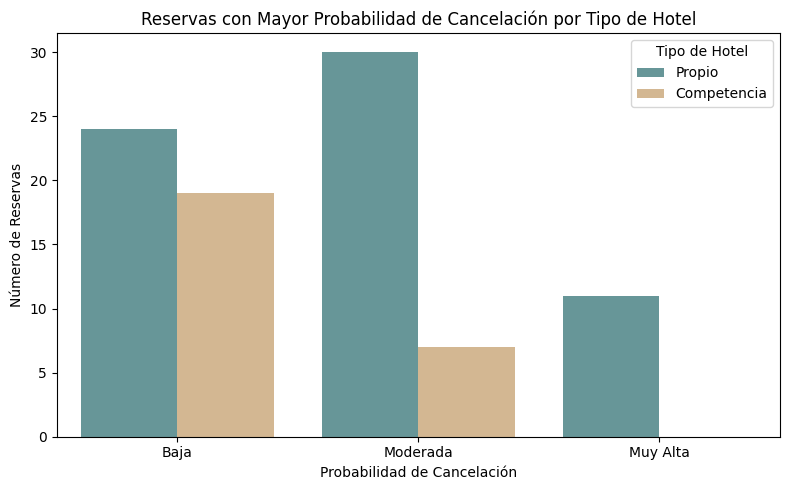

In [42]:




plt.figure(figsize=(8, 5))
sns.countplot(data=df_reservas_cancelables, x="Probabilidad_Cancelacion", hue="competencia", palette=["cadetblue", "burlywood"])
plt.title("Reservas con Mayor Probabilidad de Cancelación por Tipo de Hotel")
plt.ylabel("Número de Reservas")
plt.xlabel("Probabilidad de Cancelación")
plt.legend(title="Tipo de Hotel", labels=["Propio", "Competencia"])
plt.tight_layout()
plt.show()


In [43]:
# Agrupamos por hotel y probabilidad de cancelación
cancelaciones_por_hotel = (
    df_reservas_cancelables
    .groupby(["nombre_hotel", "Probabilidad_Cancelacion"])
    .size()
    .reset_index(name="reservas")
)


fig = px.bar(
    cancelaciones_por_hotel,
    x="nombre_hotel",
    y="reservas",
    color="Probabilidad_Cancelacion",
    title="Reservas con Mayor Probabilidad de Cancelación por Nombre de Hotel",
    barmode="group"
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

COMPROBAR SI HAY CLIENTES QUE HAN RESERVADO EN HOTELES PROPIOS Y DE LA COMPETENCIA PARA LA MISMA FECHA

In [12]:
clientes_propios = df_final[df_final["competencia"] == False]["id_cliente"].unique()
clientes_propios = set(clientes_propios) # Lo pasamos a set para coger valores únicos automáticamente

clientes_competencia = df_final[df_final["competencia"] == True]["id_cliente"].unique()
clientes_competencia = set(clientes_competencia)

clientes_doble_reserva = clientes_propios.intersection(clientes_competencia)

len(clientes_doble_reserva)




40

In [13]:
df_clientes_doble_reserva = df_final[df_final["id_cliente"].isin(clientes_doble_reserva)]

df_clientes_doble_reserva


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad
89,ce727457-b05d-4d48-b5e5-002a1a7274a8,3742,David,Julián,david.julián@example.com,False,2025-02-03,2025-03-01,2025-03-02,13,198.89,Hotel Palacio Imperial,3.01,Madrid,1
429,af0d8fa1-4c3f-46d7-beb3-944976dea50c,13440,Sofía,Lamas,sofía.lamas@example.com,False,2025-02-09,2025-03-01,2025-03-02,12,382.83,Hotel Monte Verde,3.10,Madrid,1
590,aab4eaef-10ef-4162-a487-c006fcdd3eaf,8331,Leoncio,Robledo,leoncio.robledo@example.com,False,2025-02-04,2025-03-01,2025-03-02,8,486.09,Hotel Los Almendros,3.01,Madrid,1
1098,1707d7ca-72ff-4af9-9786-0f39e4504a51,5033,Eva,Bárcena,eva.bárcena@example.com,False,2025-02-06,2025-03-01,2025-03-02,9,201.79,Hotel Luz de Madrid,3.05,Madrid,1
1832,000eecd9-8b82-468f-bbbb-1acffb643f35,9553,Marina,Vargas,marina.vargas@example.com,False,2025-02-05,2025-03-01,2025-03-02,16,136.77,Hotel Sol y Luna,3.01,Madrid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14339,2de93c59-fd50-4de4-8319-bb06e82d9d0b,11106,Olalla,Lillo,olalla.lillo@example.com,True,2025-02-26,2025-03-01,2025-03-02,20,255.00,Novotel Madrid Center,4.60,Madrid,1
14571,04d309d7-325b-4086-864e-fcc630908f2c,12247,Reyes,Cruz,reyes.cruz@example.com,True,2025-02-26,2025-03-01,2025-03-02,28,119.00,ibis budget Madrid Centro las Ventas,4.30,Madrid,1
14714,ccdfda32-d7c5-4837-b068-76020623b924,1242,Anita,Rueda,anita.rueda@example.com,True,2025-02-26,2025-03-01,2025-03-02,27,95.00,ibis budget Madrid Calle Alcalá,4.30,Madrid,1
14806,2fc7f17c-5bd7-4e8d-a775-4f364cbbb381,14033,Trinidad,Ramis,trinidad.ramis@example.com,True,2025-02-26,2025-03-01,2025-03-02,25,119.00,ibis Madrid Calle Alcalá,4.50,Madrid,1


In [11]:
df_final.to_pickle("../data/final/hoteles_final.pkl")